In [1]:
import keras
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from models.lenet_official import LeNet
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
from dataset_loaders import SimpleDatasetLoader
from imutils import paths
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
sdl = SimpleDatasetLoader()

In [3]:
image_paths = list(paths.list_images('./datasets/digits'))

In [4]:
(data, labels) = sdl.load(image_paths, verbose=500)

[INFO] processed 500/2301
[INFO] processed 1000/2301
[INFO] processed 1500/2301
[INFO] processed 2000/2301


In [5]:
data = data.astype("float") / 255.0

In [6]:
(x_train, x_test, y_train, y_test) = train_test_split(data, labels, test_size=0.25, random_state=42)

In [7]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1725, 28, 28), (1725,), (576, 28, 28), (576,))

In [8]:
y_train = LabelBinarizer().fit_transform(y_train)

In [9]:
y_test = LabelBinarizer().fit_transform(y_test)

In [10]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1725, 28, 28), (1725, 10), (576, 28, 28), (576, 10))

In [11]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)

In [12]:
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [13]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1725, 28, 28, 1), (1725, 10), (576, 28, 28, 1), (576, 10))

In [14]:
opt = SGD(lr=0.01, decay=0.01 / 100, momentum=0.9, nesterov=True))

In [15]:
model = LeNet.build(width=28, height=28, depth=1, num_classes=10)

In [16]:
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [17]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('models/best_weights.hdf5', monitor="val_loss", save_best_only=True, verbose=1)
callbacks = [checkpoint]

In [18]:
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,height_shift_range=0.1, shear_range=0.2, 
                         zoom_range=0.2,horizontal_flip=True, fill_mode="nearest")

In [19]:
H = model.fit_generator(aug.flow(x_train, y_train, batch_size=32), validation_data=(x_test, y_test), 
                        steps_per_epoch=len(x_train)/32, epochs=100, 
                        verbose=1, callbacks=callbacks)

Epoch 1/100
54/53 [==============================] - 2s 29ms/step - loss: 2.3148 - acc: 0.1118 - val_loss: 2.2840 - val_acc: 0.1493

Epoch 00001: val_loss improved from inf to 2.28396, saving model to models/best_weights.hdf5
Epoch 2/100
54/53 [==============================] - 0s 7ms/step - loss: 2.2953 - acc: 0.1484 - val_loss: 2.2818 - val_acc: 0.1493

Epoch 00002: val_loss improved from 2.28396 to 2.28183, saving model to models/best_weights.hdf5
Epoch 3/100
54/53 [==============================] - 0s 8ms/step - loss: 2.2860 - acc: 0.1550 - val_loss: 2.2801 - val_acc: 0.1493

Epoch 00003: val_loss improved from 2.28183 to 2.28006, saving model to models/best_weights.hdf5
Epoch 4/100
54/53 [==============================] - 0s 8ms/step - loss: 2.2884 - acc: 0.1560 - val_loss: 2.2810 - val_acc: 0.1493

Epoch 00004: val_loss did not improve from 2.28006
Epoch 5/100
54/53 [==============================] - 0s 8ms/step - loss: 2.2912 - acc: 0.1578 - val_loss: 2.2797 - val_acc: 0.1493

E

Epoch 37/100
54/53 [==============================] - 0s 7ms/step - loss: 2.1572 - acc: 0.2387 - val_loss: 2.0239 - val_acc: 0.3681

Epoch 00037: val_loss improved from 2.03416 to 2.02388, saving model to models/best_weights.hdf5
Epoch 38/100
54/53 [==============================] - 0s 8ms/step - loss: 2.1325 - acc: 0.2462 - val_loss: 1.9673 - val_acc: 0.3472

Epoch 00038: val_loss improved from 2.02388 to 1.96732, saving model to models/best_weights.hdf5
Epoch 39/100
54/53 [==============================] - 0s 8ms/step - loss: 2.1267 - acc: 0.2457 - val_loss: 1.9459 - val_acc: 0.4167

Epoch 00039: val_loss improved from 1.96732 to 1.94593, saving model to models/best_weights.hdf5
Epoch 40/100
54/53 [==============================] - 0s 8ms/step - loss: 2.1091 - acc: 0.2441 - val_loss: 1.9001 - val_acc: 0.3733

Epoch 00040: val_loss improved from 1.94593 to 1.90012, saving model to models/best_weights.hdf5
Epoch 41/100
54/53 [==============================] - 0s 7ms/step - loss: 2.0825

54/53 [==============================] - 0s 8ms/step - loss: 1.5710 - acc: 0.4567 - val_loss: 1.0821 - val_acc: 0.7101

Epoch 00073: val_loss did not improve from 1.06490
Epoch 74/100
54/53 [==============================] - 0s 7ms/step - loss: 1.5041 - acc: 0.4764 - val_loss: 0.9839 - val_acc: 0.7812

Epoch 00074: val_loss improved from 1.06490 to 0.98386, saving model to models/best_weights.hdf5
Epoch 75/100
54/53 [==============================] - 0s 8ms/step - loss: 1.5193 - acc: 0.4837 - val_loss: 1.0285 - val_acc: 0.7066

Epoch 00075: val_loss did not improve from 0.98386
Epoch 76/100
54/53 [==============================] - 0s 8ms/step - loss: 1.4888 - acc: 0.4720 - val_loss: 0.9314 - val_acc: 0.7691

Epoch 00076: val_loss improved from 0.98386 to 0.93143, saving model to models/best_weights.hdf5
Epoch 77/100
54/53 [==============================] - 0s 8ms/step - loss: 1.4706 - acc: 0.5032 - val_loss: 1.0206 - val_acc: 0.7031

Epoch 00077: val_loss did not improve from 0.93143
E

In [20]:
predictions = model.predict(x_test, batch_size=32)

In [21]:
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), 
                      target_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98        86
          1       1.00      0.83      0.90        63
          2       0.75      0.99      0.85        75
          3       0.86      0.78      0.82        49
          4       1.00      1.00      1.00        51
          5       1.00      0.56      0.72        43
          6       0.88      0.88      0.88        43
          7       0.82      1.00      0.90        53
          8       0.91      0.96      0.94        53
          9       0.96      0.83      0.89        60

avg / total       0.91      0.90      0.89       576



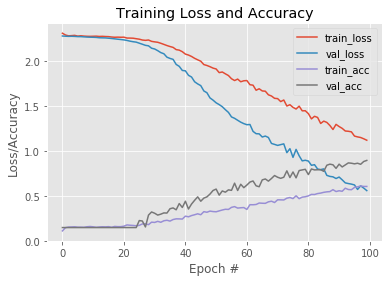

In [22]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()